In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"

In [4]:
iris_train = pd.read_csv('2.4_train_iris.csv', index_col=0)
iris_test = pd.read_csv('2.4_test_iris.csv', index_col=0)

In [10]:
iris_train.head()

,sepal length,sepal width,petal length,petal width,species
130,7.4,2.8,6.1,1.9,2
7,5.0,3.4,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
142,5.8,2.7,5.1,1.9,2
109,7.2,3.6,6.1,2.5,2


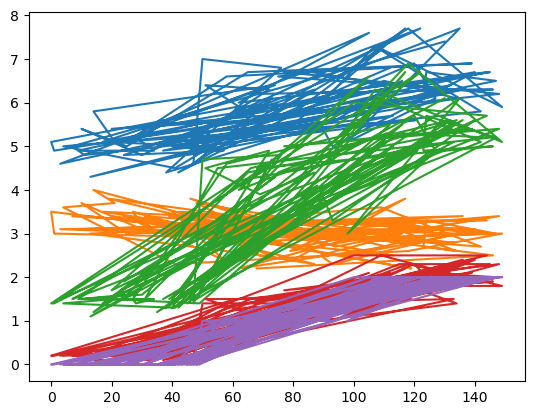

In [13]:
plt.plot(iris_train)

In [26]:
X_train = iris_train.drop(["species"], axis=1)
y_train = iris_train.species
X_test = iris_test.drop(["species"], axis=1)
y_test = iris_test.species

In [27]:
max_depth_values = range(1, 100)
scores_data = pd.DataFrame()
np.random.seed(0)

In [28]:
for max_depth in max_depth_values:
    my_awesome_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    my_awesome_tree.fit(X_train, y_train)
    train_score = my_awesome_tree.score(X_train, y_train)
    test_score = my_awesome_tree.score(X_test, y_test)
    #mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [29]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'],
                          value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

<AxesSubplot:xlabel='max_depth', ylabel='score'>

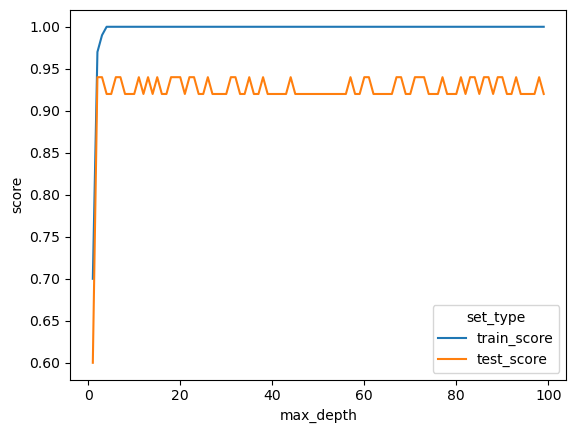

In [30]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

In [3]:
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv('2.4_dogs_n_cats.csv')

In [50]:
df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [51]:
X = df.drop(['Вид'], axis=1)
y = df.Вид
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=13)

In [67]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [68]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [69]:
clf.score(X_test, y_test)

1.0

In [70]:
df_test = pd.read_json('2.4_test_data.txt')

In [71]:
df_test.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,0,0
1,20,24.0,1,1,0
2,28,33.6,1,1,0
3,17,20.4,1,1,0
4,22,26.4,1,1,0


In [73]:
y_pred = pd.DataFrame(clf.predict(df_test))

In [83]:
y_pred = y_pred.rename(columns={0:'animal'})
y_pred

,animal
0,собачка
1,собачка
2,собачка
3,собачка
4,собачка
...,...
95,котик
96,котик
97,котик
98,котик


In [85]:
y_pred.query("animal == 'собачка'").animal.count()

42

In [4]:
df = pd.read_csv('2.4_songs.csv')

In [5]:
df.head()

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
